In [1]:
# Predicting Housing Prices

#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Importing our csv file
df_train = pd.read_csv(r'C:\Users\Jelani Williams\Downloads\train.csv')

In [5]:
# the .shape method in pandas identifies the number of rows and columns in our dataset as (rows, columns)
df_train.shape 

(1460, 81)

In [35]:
# the .head(10) function will show us the first 10 rows in our dataset
print(df_train.head(10))

df_train.dtypes

# .nunique() counts the number of unique values in each column 
#df_train.nunique() 

# counts the number of missing values in each column 
#df_train.isna().sum() 

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   
5   6          50       RL    14115   Pave      IR1         Lvl    AllPub   
6   7          20       RL    10084   Pave      Reg         Lvl    AllPub   
7   8          60       RL    10382   Pave      IR1         Lvl    AllPub   
8   9          50       RM     6120   Pave      Reg         Lvl    AllPub   
9  10         190       RL     7420   Pave      Reg         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [36]:
# Check the variables (column names) imported
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [37]:
#descriptive statistics summary of a variable including: count, mean, SD, min, max, type etc
df_train['SalePrice'].describe()

count      1457.000000
mean     180942.138641
std       79521.569966
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

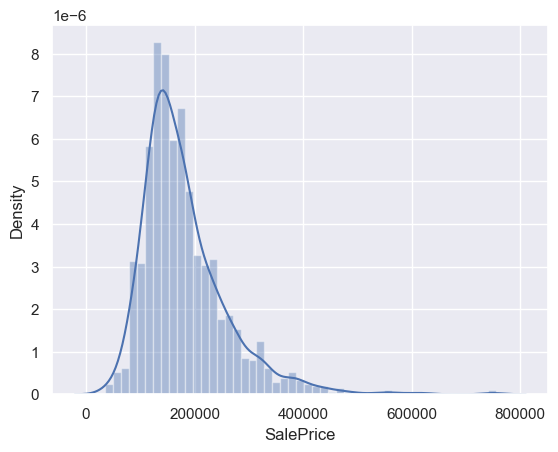

In [38]:
#histogram
sns.distplot(df_train['SalePrice']);

#this uses seaborn to create a distplot. Check if the histogram is normally distributed or deviates and has + or - skewness.

In [39]:
#skewness and kurtosis checks
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

#skewness is a measure of asymmetry of the probability distribution of a real-valued random variable about it's mean.
#positive skewness is the tail on the right-side and negative is the tail on the left-side.
#kurtosis is a measure of it's tailness, how long the tail is of the probability distribution.

Skewness: 1.880363
Kurtosis: 6.516048


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


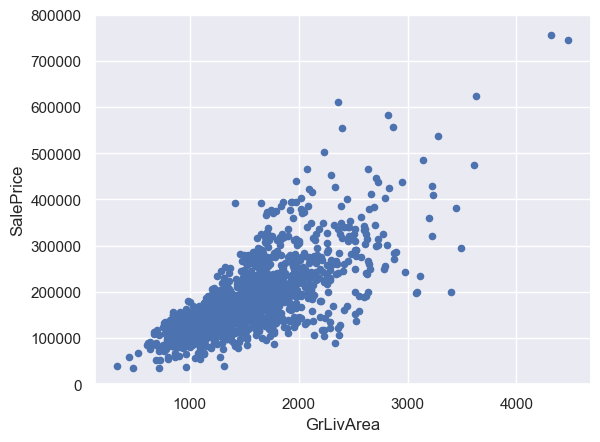

In [40]:
#scatter plot grlivarea/saleprice. Does the trend follow a linear, exponential, or some other equation?
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


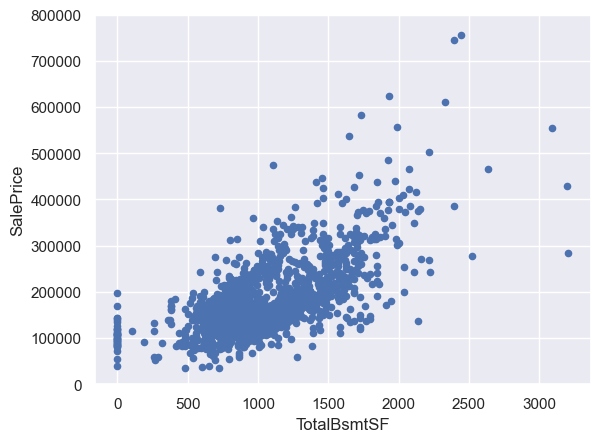

In [41]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

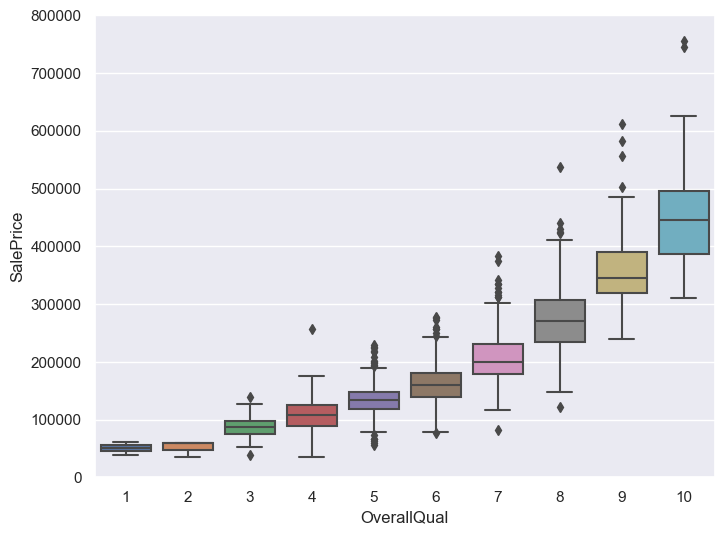

In [42]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

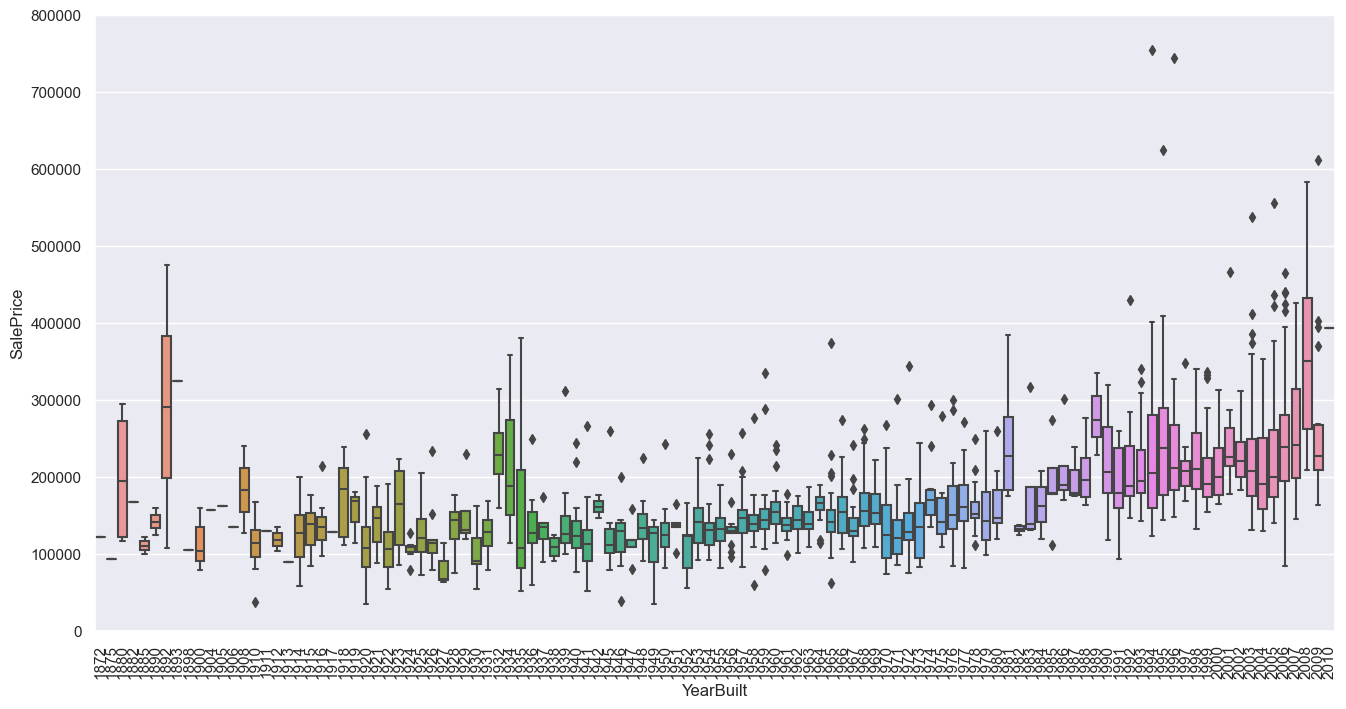

In [43]:
#additional box plot
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

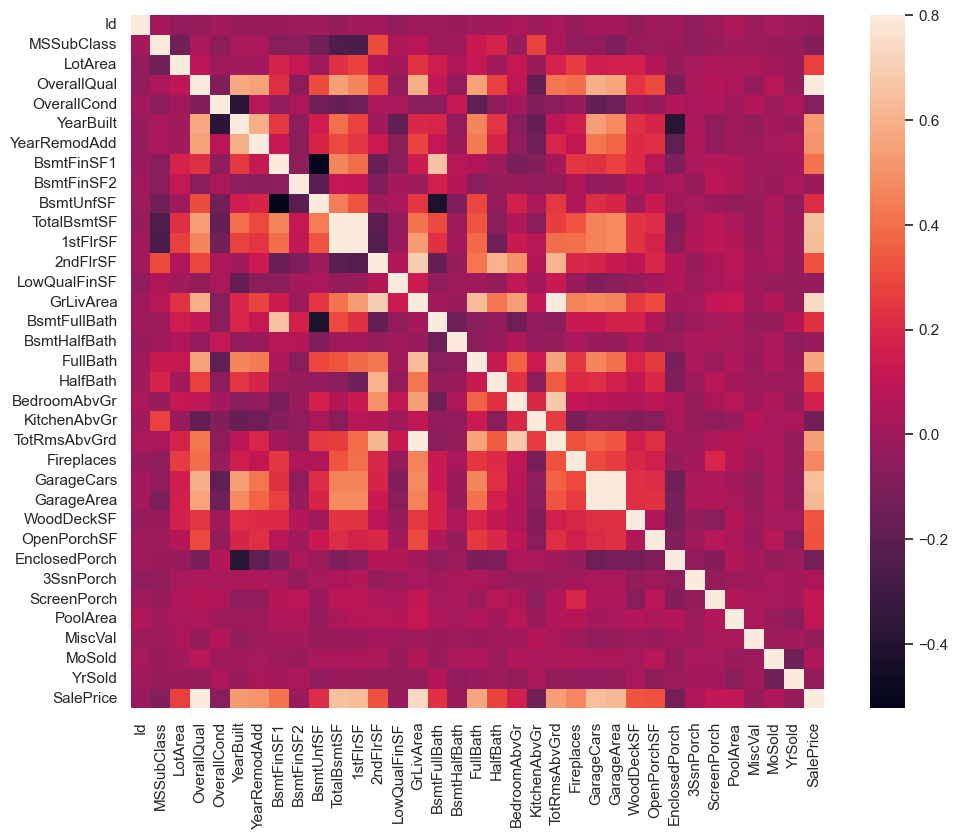

In [44]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

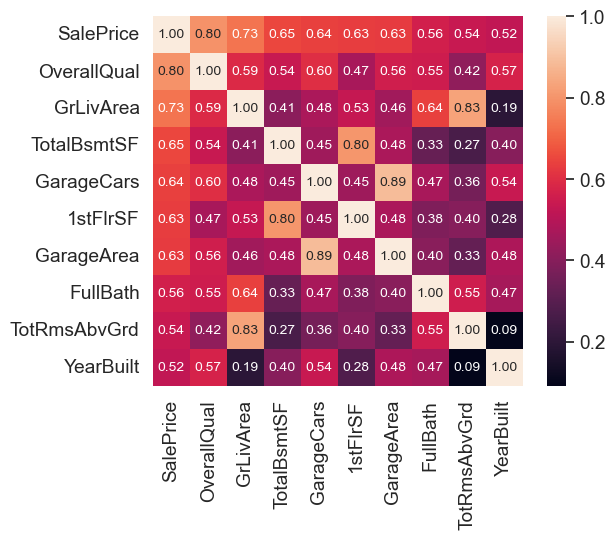

In [45]:
#saleprice correlation matrix zoomed in
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

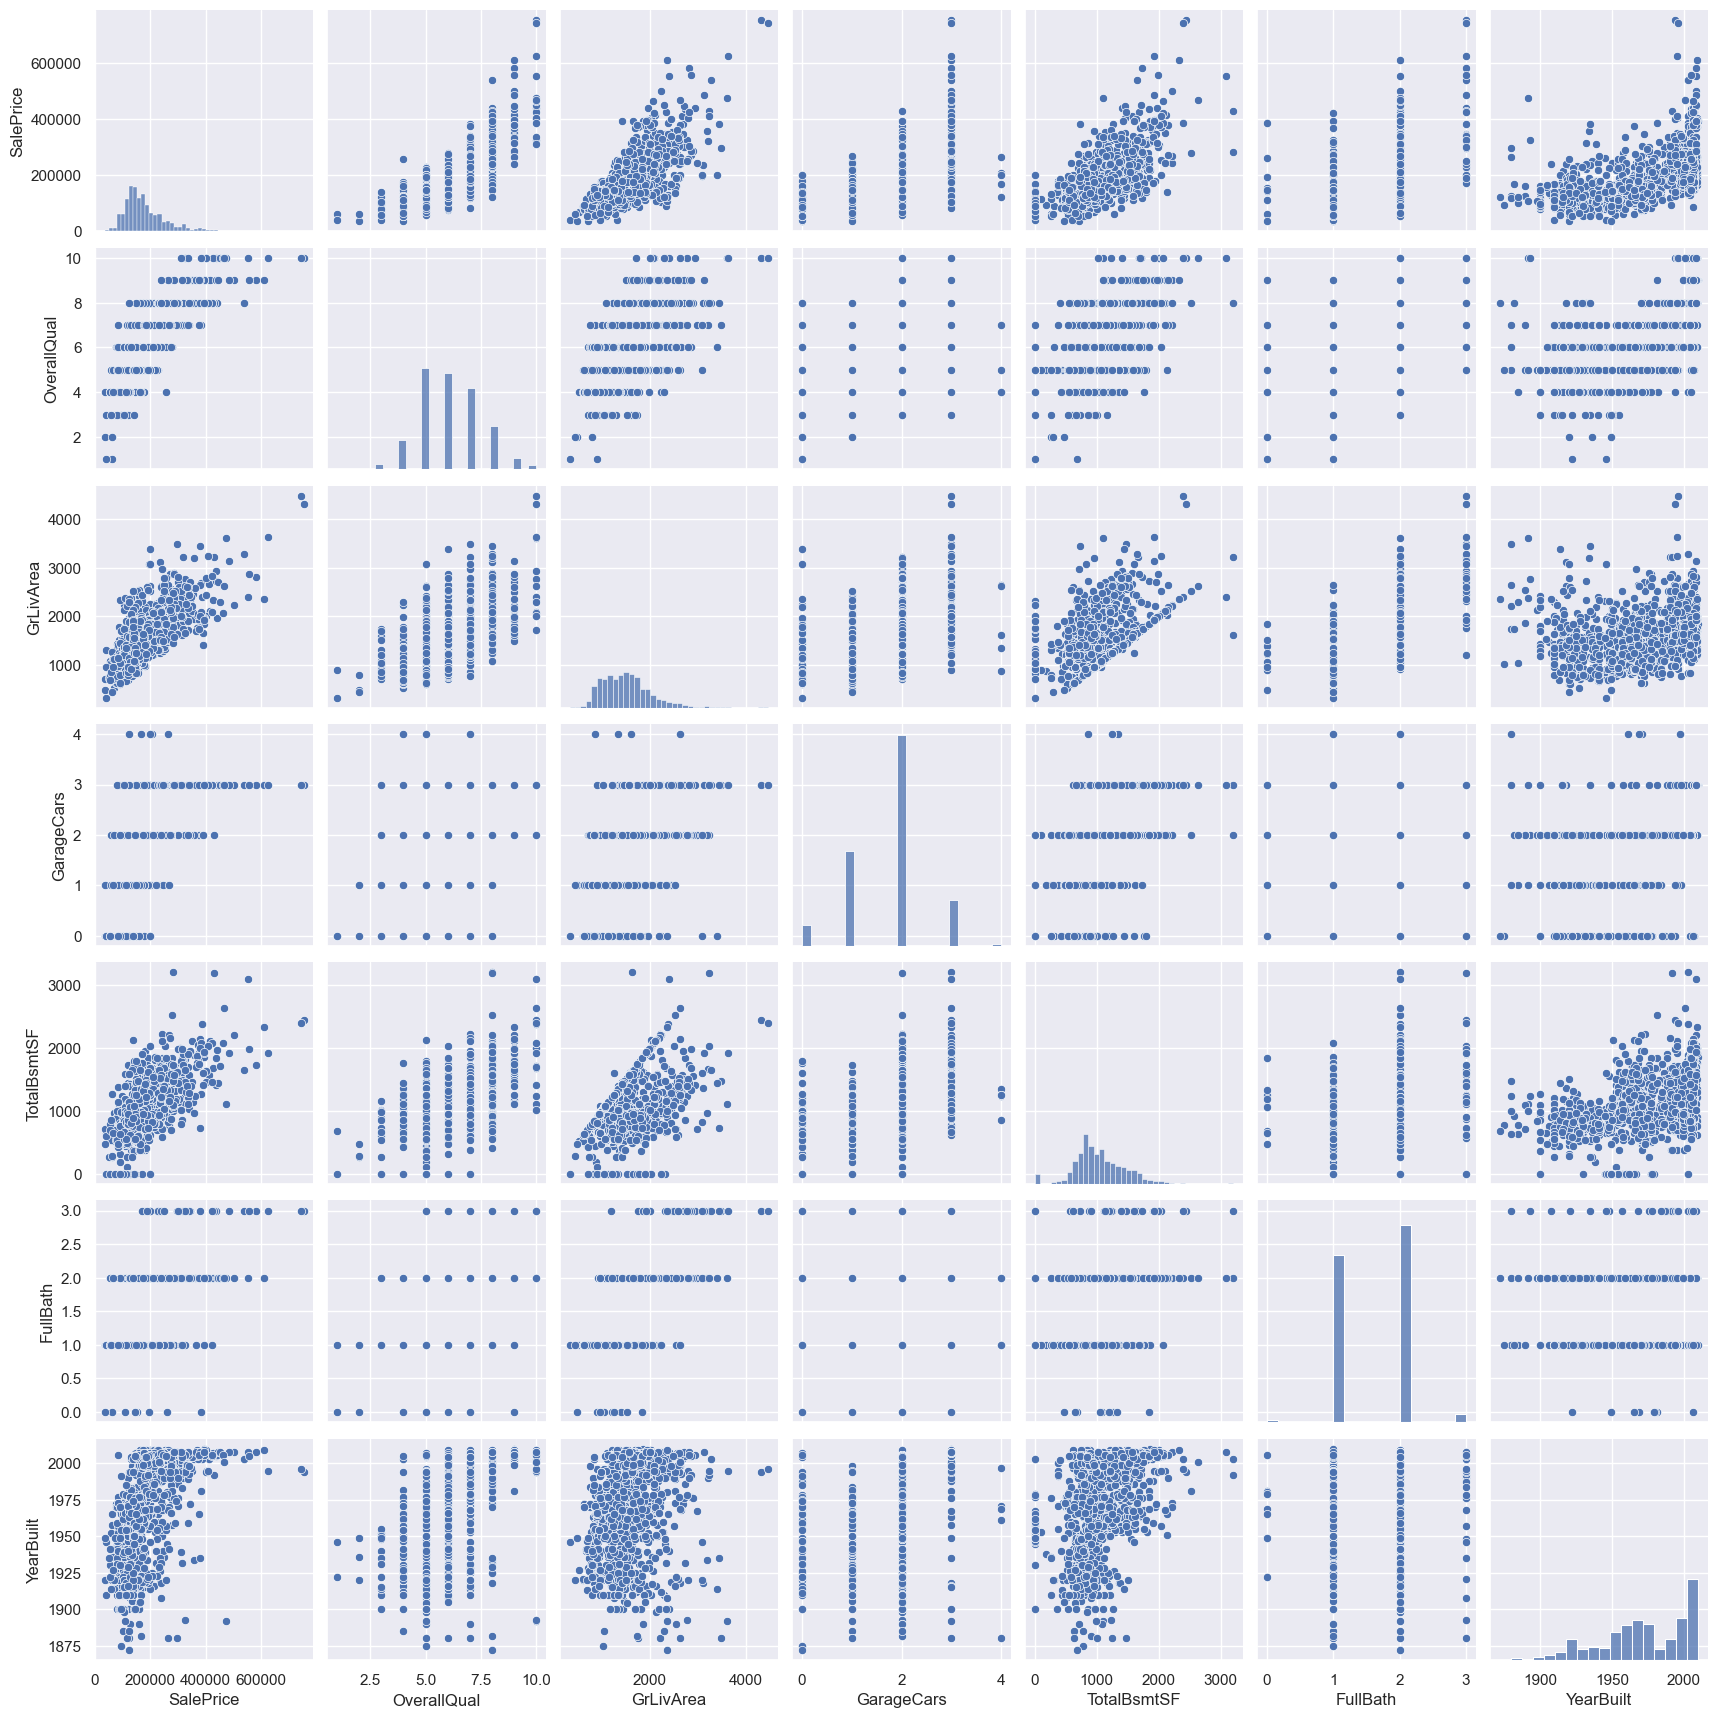

In [46]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [47]:
#missing data (how prevelent is the missing data? is it random or have a pattern? Reduces sample size?)
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
Fireplaces,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0
GrLivArea,0,0.0
BsmtFullBath,0,0.0
BsmtHalfBath,0,0.0
FullBath,0,0.0
HalfBath,0,0.0


In [48]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [49]:
#Univariate Analysis
#standardizing data, this means converting data values to have mean of 0 and a SD of 1. This establishes a treshold that defines an outlier.
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83714031]
 [-1.83197013]
 [-1.79940175]
 [-1.78179041]
 [-1.77298475]
 [-1.62203048]
 [-1.61574072]
 [-1.58429192]
 [-1.58429192]
 [-1.57180045]]

outer range (high) of the distribution:
[[3.82490259]
 [4.036704  ]
 [4.49161726]
 [4.70546914]
 [4.72535736]
 [5.05685293]
 [5.41818712]
 [5.58603569]
 [7.09557834]
 [7.22137356]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


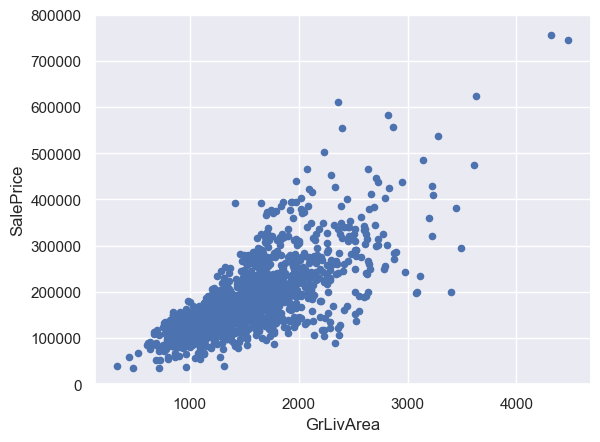

In [50]:
#bivariate analysis saleprice/grlivarea. 
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [52]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

#Deleting outliers
#train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


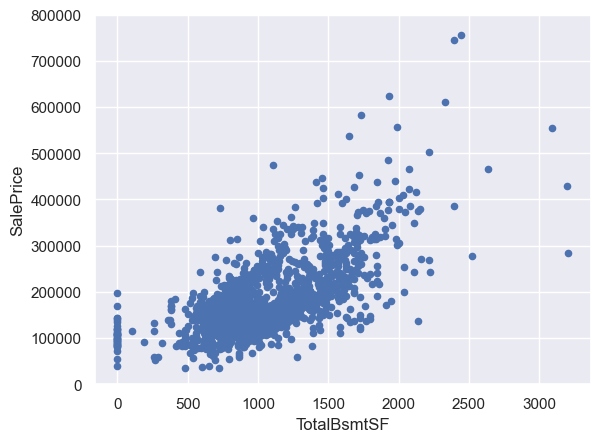

In [53]:
#bivariate analysis saleprice/grlivarea. Additional scatterplot after removing outliers
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

"(mu, sigma) = norm.fit(train['SalePrice'])\nprint( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))\n\n#Now plot the distribution\nplt.legend(['Normal dist. ($\\mu=$ {:.2f} and $\\sigma=$ {:.2f} )'.format(mu, sigma)],\n            loc='best')\nplt.ylabel('Frequency')\nplt.title('SalePrice distribution')\n\n#Get also the QQ-plot\nfig = plt.figure()\nres = stats.probplot(train['SalePrice'], plot=plt)\nplt.show()"

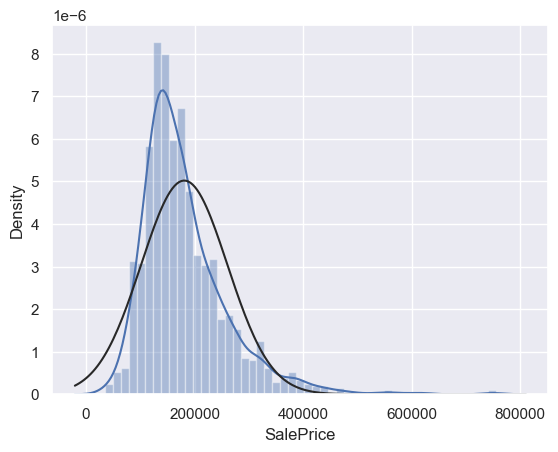

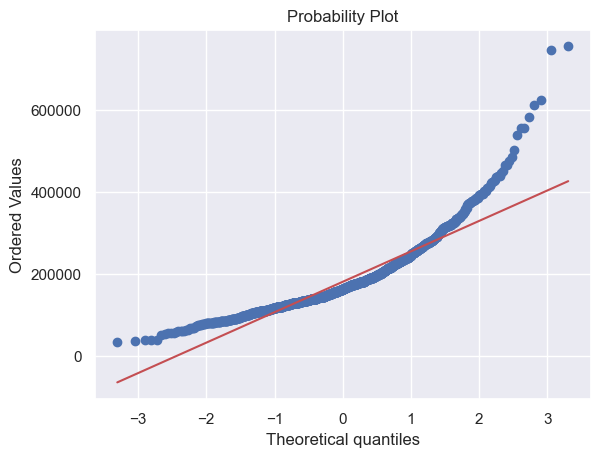

In [55]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# OR
#sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
"""(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()"""

In [56]:
#SalePrice is not normal, shows peakedness, and doesn't follow the diagonal line. In the case of positive skewness, log transformations usually work well.
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

' OR \n#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column\ntrain["SalePrice"] = np.log1p(train["SalePrice"])\n\n#Check the new distribution \nsns.distplot(train[\'SalePrice\'] , fit=norm);\n\n# Get the fitted parameters used by the function\n(mu, sigma) = norm.fit(train[\'SalePrice\'])\nprint( \'\n mu = {:.2f} and sigma = {:.2f}\n\'.format(mu, sigma))\n\n#Now plot the distribution\nplt.legend([\'Normal dist. ($\\mu=$ {:.2f} and $\\sigma=$ {:.2f} )\'.format(mu, sigma)],\n            loc=\'best\')\nplt.ylabel(\'Frequency\')\nplt.title(\'SalePrice distribution\')\n\n#Get also the QQ-plot\nfig = plt.figure()\nres = stats.probplot(train[\'SalePrice\'], plot=plt)\nplt.show()\n'

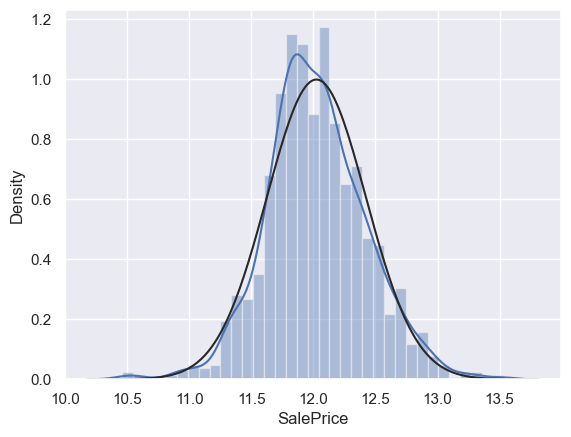

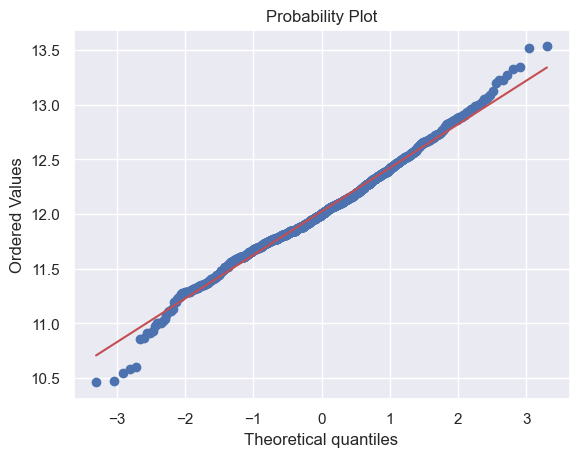

In [58]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

""" OR 
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
"""

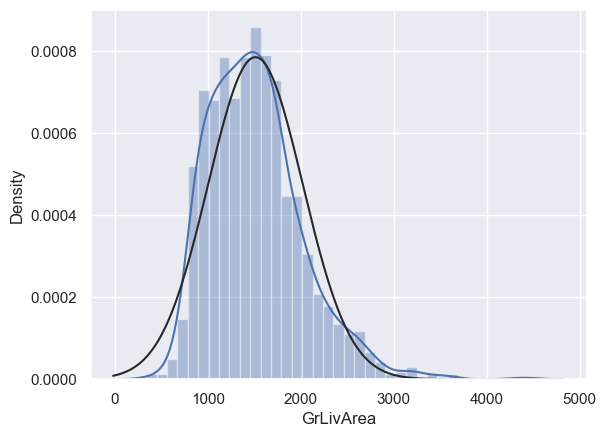

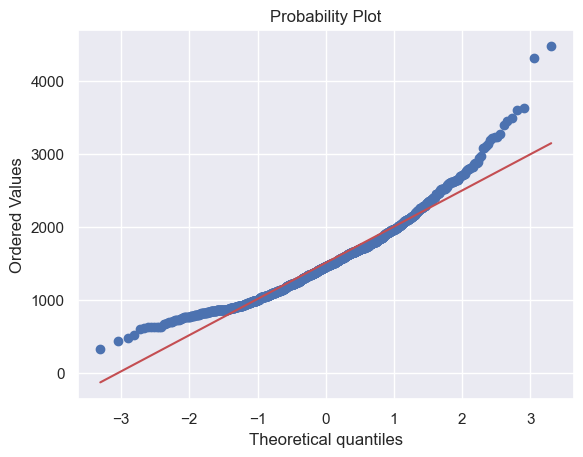

In [59]:
#Now checking on GrLivArea
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [60]:
#same positive skewness, etc as SalePrice. Apply the log transformation
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

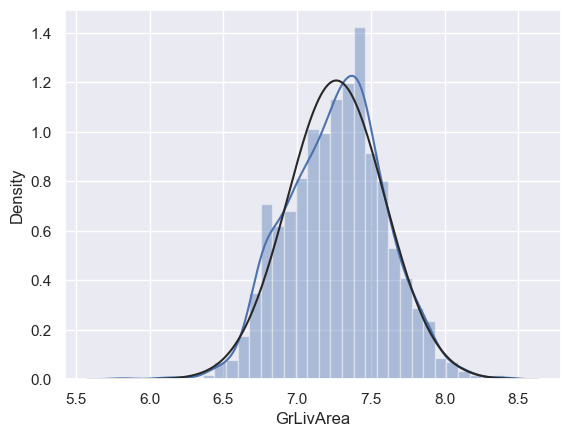

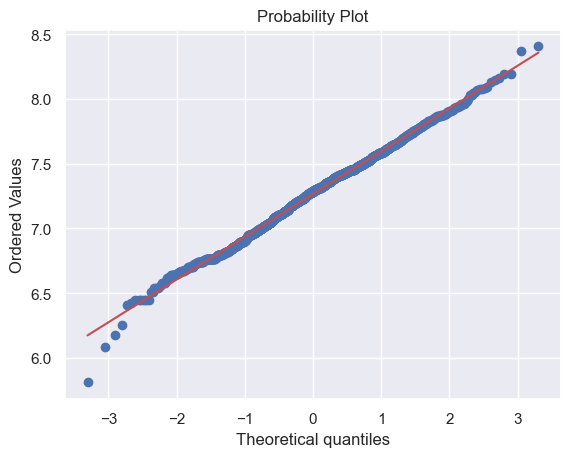

In [61]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

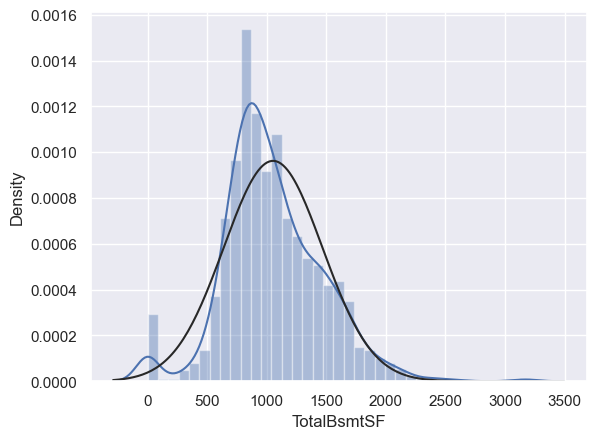

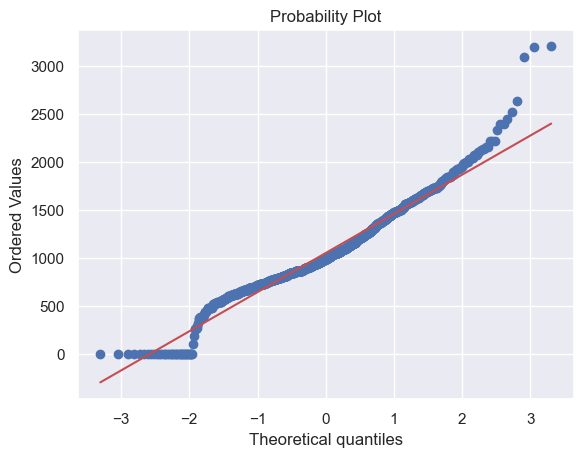

In [62]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [63]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [64]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

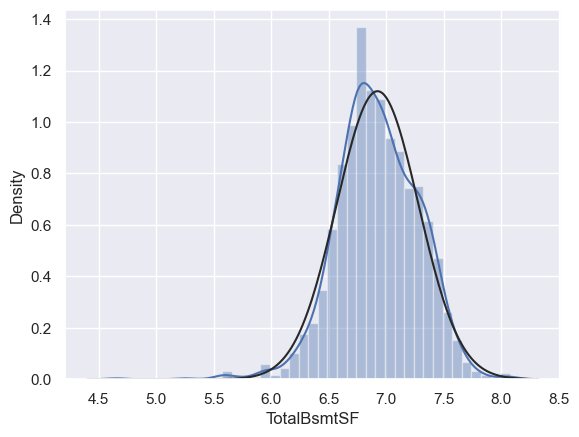

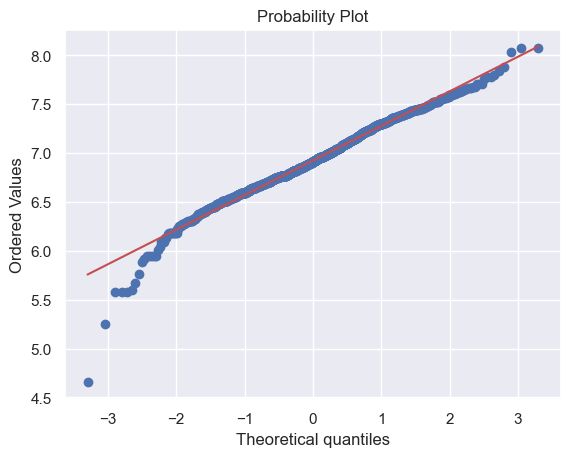

In [65]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

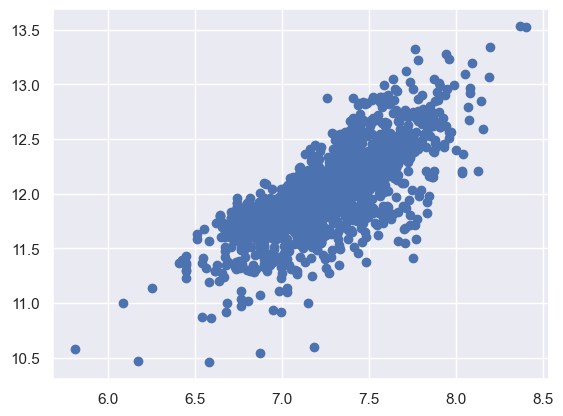

In [66]:
#scatter plot to check for homoscedasticity. Departures from an equal dispersion are shown by shapes like cones and diamonds (as in our scatter plot above.)
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [67]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)